In [401]:
import numpy as np
import mlrose_hiive as mlrose
import random
import time
import matplotlib.pyplot as plt


In [402]:
results = {
    'problem': 'n_queens',
    'r_hill': {
        'lengths':[], 
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'GA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'SA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'MIMIC': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
}

# Problem Definitions

In [403]:
#https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
# N-QUEENS
queens_prob = {
    'fitness': mlrose.Queens(),
    'max_iters': 100,
    'max_attempts': 20,
    'max_val': 8,
    'length': 8,
    'maximize': False,
    'restarts': 5,
    'schedule': mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
}
travelling_sales_prob = {
    'fitness_coords': mlrose.TravellingSales(coords = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)])
}

lengths = [4, 8, 16, 32, 64, 128]

# N Queens Problem

## 1.  Random hill climb

In [404]:
#maximization fitness fn from mlrose: https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

def print_board(state):
    for i in range(len(state)):
        row = []
        for j in range(len(state)):

            if state[i] == j:
                row.append('[X]')
            else:
                row.append('[_]')
        print(''.join(row))
    

In [405]:



#fitness_fn = mlrose.CustomFitness(queens_max)
fitness_fn = mlrose.Queens()

#p = queens_prob

length = 8
maximize = False
max_val = 8
max_iters = 200
restarts = 5
problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )


In [406]:
state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                 max_attempts = max_attempts, 
                                                 max_iters=max_iters, 
                                                 restarts=restarts, 
                                                 curve=True, 
                                                 random_state=13
                                                )

In [407]:
#results['r_hill']['fit_curves'].append(curve)
print(state)
print(fitness)
print(len(curve))
print_board(state)

[2 0 6 4 7 1 3 5]
0.0
179
[_][_][X][_][_][_][_][_]
[X][_][_][_][_][_][_][_]
[_][_][_][_][_][_][X][_]
[_][_][_][_][X][_][_][_]
[_][_][_][_][_][_][_][X]
[_][X][_][_][_][_][_][_]
[_][_][_][X][_][_][_][_]
[_][_][_][_][_][X][_][_]


###  1.1 Hyperparam analysis

#### 1.1.1 problem complexity

In [408]:
#length = 8
maximize = False
#max_val = 8
max_iters = 10000
restarts = 5

fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                     max_attempts = max_attempts, 
                                                     max_iters=max_iters, 
                                                     restarts=restarts[i], 
                                                     curve=True, 
                                                     random_state=13
                                                    )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
0.0
starting length  16
<class 'int'>
1.0
starting length  32
<class 'int'>
5.0
starting length  64
<class 'int'>
15.0


In [409]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64]
[0.0, 0.0, 1.0, 5.0, 15.0]
[0.09275650978088379, 0.19050049781799316, 0.5893781185150146, 1.3424086570739746, 4.369363307952881]
[139, 179, 301, 446, 624]


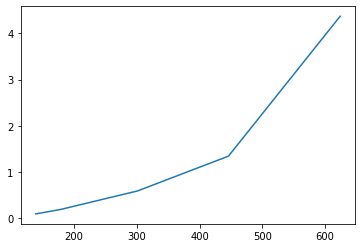

In [410]:
plt.plot(iterations,times)
plt.show()

In [411]:
results['r_hill']['fits'] = fits
results['r_hill']['fit_curves'] = curves
results['r_hill']['iterations'] = iterations
results['r_hill']['times'] = times
results['r_hill']['lengths'] = lengths


## 2. Genetic Algorithm

In [412]:
population_size = 100
mutation_prob = 0.5
max_attempts = 100
max_iters = 200

length = 8
max_val = 8

problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )
state, fitness, curve = mlrose.genetic_alg(problem, 
                                           pop_size=population_size, 
                                           mutation_prob=mutation_prob, 
                                           max_attempts=max_attempts, 
                                           max_iters=max_iters, 
                                           curve=True, 
                                           random_state=13
                                          )

In [413]:
print(state)
print(fitness)
print_board(state)

[4 2 4 6 1 3 5 7]
1.0
[_][_][_][_][X][_][_][_]
[_][_][X][_][_][_][_][_]
[_][_][_][_][X][_][_][_]
[_][_][_][_][_][_][X][_]
[_][X][_][_][_][_][_][_]
[_][_][_][X][_][_][_][_]
[_][_][_][_][_][X][_][_]
[_][_][_][_][_][_][_][X]


## 2.1 Hyperparam Analysis

In [414]:
population_size = 100
mutation_prob = 0.5
max_attempts = 100
max_iters = 10000

fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]

i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    state, fitness, curve = mlrose.genetic_alg(problem, 
                                               max_iters=max_iters, 
                                               curve=True, 
                                               random_state=13
                                              )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
1.0
starting length  16
<class 'int'>
7.0
starting length  32
<class 'int'>
17.0
starting length  64
<class 'int'>
32.0


In [415]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64]
[0.0, 1.0, 7.0, 17.0, 32.0]
[0.40192604064941406, 0.8088366985321045, 0.9714021682739258, 2.7207231521606445, 8.682826042175293]
[11, 14, 11, 15, 30]


In [416]:
results['GA']['fits'] = fits
results['GA']['fit_curves'] = curves
results['GA']['iterations'] = iterations
results['GA']['times'] = times
results['GA']['lengths'] = lengths


## Simulated Annealing

In [417]:
mutation_prob = 0.2
max_attempts = 100
max_iters = 10000

length = 8
max_val = 8

problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )
schedule = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001)
state, fitness, curve = mlrose.simulated_annealing(problem, 
                                                   schedule=schedule,
                                                   max_attempts=max_attempts, 
                                                   max_iters=max_iters, 
                                                   curve=True, 
                                                   random_state=13
                                                  )

In [418]:
print(state)
print(fitness)
print(len(curve))
print_board(state)

[0 6 4 7 1 3 5 2]
0.0
1409
[X][_][_][_][_][_][_][_]
[_][_][_][_][_][_][X][_]
[_][_][_][_][X][_][_][_]
[_][_][_][_][_][_][_][X]
[_][X][_][_][_][_][_][_]
[_][_][_][X][_][_][_][_]
[_][_][_][_][_][X][_][_]
[_][_][X][_][_][_][_][_]


In [419]:


fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    schedule = mlrose.GeomDecay(init_temp=10, decay=0.95, min_temp=0.001)
    state, fitness, curve = mlrose.simulated_annealing(problem, 
                                                       schedule=schedule,
                                                       max_attempts=max_attempts, 
                                                       max_iters=max_iters, 
                                                       curve=True, 
                                                       random_state=13
                                                      )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
0.0
starting length  16
<class 'int'>
2.0
starting length  32
<class 'int'>
5.0
starting length  64
<class 'int'>
7.0


In [420]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64]
[0.0, 0.0, 2.0, 5.0, 7.0]
[0.03194570541381836, 0.37898850440979004, 0.35202622413635254, 0.4278860092163086, 6.251298189163208]
[159, 1409, 843, 564, 4196]


In [421]:
results['SA']['fits'] = fits
results['SA']['fit_curves'] = curves
results['SA']['iterations'] = iterations
results['SA']['times'] = times
results['SA']['lengths'] = lengths

## MIMIC

In [422]:
population_size = 100
max_attempts = 100
max_iters = 100
keep_pct = 0.3

length = 8
max_val = 8

problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness_fn, 
                             maximize = maximize, 
                             max_val = max_val
                            )
state,fitness, curve = mlrose.mimic(problem, 
                                    pop_size = population_size, 
                                    keep_pct = keep_pct, 
                                    max_attempts = max_attempts, 
                                    max_iters = max_iters,  
                                    curve = True, 
                                    random_state = 1
                                   )

In [423]:
print(state)
print(fitness)
print(len(curve))
print_board(state)

[1 5 7 1 6 0 6 4]
2.0
100
[_][X][_][_][_][_][_][_]
[_][_][_][_][_][X][_][_]
[_][_][_][_][_][_][_][X]
[_][X][_][_][_][_][_][_]
[_][_][_][_][_][_][X][_]
[X][_][_][_][_][_][_][_]
[_][_][_][_][_][_][X][_]
[_][_][_][_][X][_][_][_]


In [424]:
population_size = 100
max_attempts = 100
max_iters = 100
keep_pct = 0.3



fits = []
times = []
iterations = []
curves = []
restarts = [5, 5, 5, 5, 5, 5]
i = 0
for length in lengths:
    print("starting length ", length)
    start_time = time.time()

    max_val = length
    print(type(max_val))
    problem = mlrose.DiscreteOpt(length =length, 
                                 fitness_fn = fitness_fn, 
                                 maximize = maximize, 
                                 max_val = max_val
                                )
    state,fitness, curve = mlrose.mimic(problem, 
                                    pop_size = population_size, 
                                    keep_pct = keep_pct, 
                                    max_attempts = max_attempts, 
                                    max_iters = max_iters,  
                                    curve = True, 
                                    random_state = 1
                                   )
    print(fitness)
   
    time_elapsed = time.time() - start_time
    fits.append(fitness)
    times.append(time_elapsed)
    iterations.append(len(curve))
    curves.append(curve)
    i+=1                             
                        

starting length  4
<class 'int'>
0.0
starting length  8
<class 'int'>
2.0
starting length  16
<class 'int'>
4.0
starting length  32
<class 'int'>
18.0
starting length  64
<class 'int'>
50.0


In [425]:
print(lengths)
print(fits)
print(times)
print(iterations)

[4, 8, 16, 32, 64]
[0.0, 2.0, 4.0, 18.0, 50.0]
[1.7782440185546875, 4.226696491241455, 13.249565839767456, 45.529271841049194, 167.84208607673645]
[100, 100, 100, 100, 100]


In [426]:
results['MIMIC']['fits'] = fits
results['MIMIC']['fit_curves'] = curves
results['MIMIC']['iterations'] = iterations
results['MIMIC']['times'] = times
results['MIMIC']['lengths'] = lengths

# Analysis

In [359]:
"""
results = {
    'problem': 'n_queens',
    'r_hill': {
        'lengths':[], 
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'GA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'SA': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
    'MIMIC': {
        'lengths':[],
        'fits':[],
        'fit_curves':[],
        'iterations': [],
        'times': [],
    },
}
"""

"\nresults = {\n    'problem': 'n_queens',\n    'r_hill': {\n        'lengths':[], \n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n    'GA': {\n        'lengths':[],\n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n    'SA': {\n        'lengths':[],\n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n    'MIMIC': {\n        'lengths':[],\n        'fits':[],\n        'fit_curves':[],\n        'iterations': [],\n        'times': [],\n    },\n}\n"

[4, 8, 16, 32, 64]


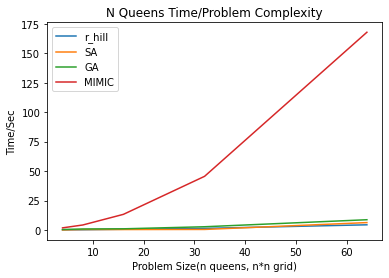

In [427]:
print(results['SA']['lengths'])

plt.plot(results['r_hill']['lengths'],results['r_hill']['times'], label="r_hill")
plt.plot(results['SA']['lengths'],results['SA']['times'], label="SA")
plt.plot(results['GA']['lengths'],results['GA']['times'], label="GA")
plt.plot(results['MIMIC']['lengths'],results['MIMIC']['times'], label="MIMIC")
plt.xlabel ('Problem Size(n queens, n*n grid)')
plt.ylabel ('Time/Sec')
plt.legend()
plt.title ('N Queens Time/Problem Complexity')
plt.show()

# Traveling Salesman

In [48]:
def tsp_generator(grid_size, num_cities):
    coords = []
    for i in range(num_cities):
        x = random.randint(0, grid_size[0]-1)
        y = random.randint(0, grid_size[1]-1)
        coords.append((x, y))
    return coords

In [49]:
coords = tsp_generator((9, 9), 8)
print(coords)

[(5, 0), (7, 4), (1, 4), (4, 2), (6, 7), (8, 8), (7, 2), (7, 0)]


In [50]:
fitness_coords = mlrose.TravellingSales(
                                        coords = [
                                                  (1, 1), (4, 2), 
                                                  (5, 2), (6, 4), 
                                                  (4, 4), (3, 6), 
                                                  (1, 5), (2, 3)
                                                 ]
                                        )

In [53]:
fitness = mlrose.TSPOpt(
                        length = 8, 
                        fitness_fn = fitness_coords, 
                        maximize=False
                       )

## Random Hill Climb

In [54]:

length = 8
maximize = False
max_val = 8
max_attempts = 20
max_iters = 100
restarts = 5
problem = mlrose.DiscreteOpt(length =length, 
                             fitness_fn = fitness, 
                             maximize = maximize, 
                             max_val = max_val
                            )

In [55]:
state, fitness, curve = mlrose.random_hill_climb(problem, 
                                                 max_attempts = max_attempts, 
                                                 max_iters=max_iters, 
                                                 restarts=restarts, 
                                                 curve=True, 
                                                 random_state=13
                                                )

AttributeError: 'TSPOpt' object has no attribute 'evaluate'

In [52]:
state, fitness = mlrose.genetic_alg(
                                    problem_fit, 
                                    random_state = 13
                                   )
print(state)
print(fitness)

ValueError: too many values to unpack (expected 2)